# Comparison of model predictions over Perturb-seq (2-gene) data by _Norman et al._[[1]](https://doi.org/10.1126/science.aax4438) 


This notebook compares the performance of a `biolord` model to `GEARS`[[2]](https://doi.org/10.1101/2022.07.12.499735) in predictions over the Perturb-Seq dataset by _Norman et al._[[1]](https://doi.org/10.1126/science.aax4438) and compares its performance to 

Running this notebook requires running:
1. [`1_perturbations_norman_preprocessing.ipynb`](https://github.com/nitzanlab/biolord_reproducibility/blob/main/notebooks/perturbations/norman/1_perturbations_norman_preprocessing.ipynb) which creates the `adata` objects, the normalization values and runs the `GEARS` comparison. 
2. [`base_experiment_norman.py`](https://github.com/nitzanlab/biolord_reproducibility/blob/main/scripts/biolord/norman/base_experiment_norman.py): set the flag `--optimal-params True` to use the reported configuration parameters.

[[1] Norman, T. M., Horlbeck, M. A., Replogle, J. M., Ge, A. Y., Xu, A., Jost, M., ... & Weissman, J. S. (2019). Exploring genetic interaction manifolds constructed from rich single-cell phenotypes. Science, 365(6455), 786-793.](https://doi.org/10.1126/science.aax4438)

[[2] Roohani, Y., Huang, K., & Leskovec, J. (2022). GEARS: Predicting transcriptional outcomes of novel multi-gene perturbations. BioRxiv, 2022-07.](https://doi.org/10.1101/2022.07.12.499735)



## Load packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
sys.path.append("../../../")
sys.path.append("../../../utils/")
from paths import DATA_DIR, FIG_DIR

## Set parameters

In [4]:
import mplscience

mplscience.set_style()

plt.rcParams["legend.scatterpoints"] = 1

In [5]:
DATA_DIR_LCL = str(DATA_DIR) + "/perturbations/norman/"
FIG_DIR_LCL = str(FIG_DIR) + "/perturbations/norman/"

## Evaluate

In [6]:
gears_res = pd.read_csv(DATA_DIR_LCL + "gears_normalized_mse_de_seeds.csv", index_col=0).T

In [7]:
biolord_res = pd.read_csv(DATA_DIR_LCL + "biolord_normalized_mse_de_seeds.csv", index_col=0).T

In [8]:
df = pd.concat([biolord_res, gears_res], keys=['biolord', 'GEARS']).reset_index()
df = df.melt(id_vars=["level_0", "level_1"], value_vars=df.columns[2:])

In [9]:
test_set = {
    "combo_seen0": "2 gene\n(2 unseen of 2)",
    "combo_seen1": "2 gene\n(1 unseen of 2)",
    "combo_seen2": "2 gene\n(0 unseen of 2)",
}
df = df.replace(test_set)

df = df.rename(columns={
    "level_0": "method",
    "level_a": "seed",
    "variable": "test set",
    "value": "MSE 20 de genes"
})

df = df[df["test set"].isin(list(test_set.values()))]

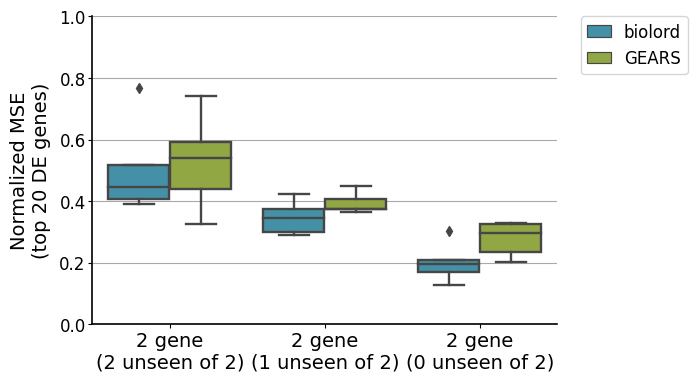

In [10]:
fig, axs = plt.subplots(1,1, figsize=(6,4))
sns.boxplot(data=df, #[df["test set"] != "1 gene\n(1 unseen of 1)"], 
            x="test set", 
            y="MSE 20 de genes",
            hue="method", 
            hue_order = ['biolord', 'GEARS'],
            palette= ["#339AB8", "#9AB833"],
            ax=axs
           )

axs.set_axisbelow(True)
axs.grid(".", color="darkgrey", axis="y")

x_labels = axs.get_xticklabels()
axs.set_xticklabels(x_labels, fontsize=14)
axs.set_xlabel("", fontsize=14)
axs.set_ylabel("Normalized MSE\n(top 20 DE genes)", fontsize=14)
axs.set_ylim(0,1)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=True)
plt.savefig(FIG_DIR_LCL + "norman_res.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
biolord_res.loc["mean"] = biolord_res.mean(0)
biolord_res

,combo_seen0,combo_seen1,combo_seen2,unseen_single
mse_de_seed1,0.445145,0.424115,0.197173,0.690319
mse_de_seed2,0.768940,0.291213,0.126923,0.710108
mse_de_seed3,0.516050,0.345147,0.209998,0.774314
mse_de_seed4,0.390894,0.299314,0.301838,0.728347
mse_de_seed5,0.406681,0.373243,0.171272,0.590245
mean,0.505542,0.346606,0.201441,0.698666


In [12]:
gears_res.loc["mean"] = gears_res.mean(0)
gears_res

,combo_seen0,combo_seen1,combo_seen2,unseen_single
mse_de_seed1,0.326320,0.374519,0.326484,0.737075
mse_de_seed2,0.740968,0.365063,0.201017,0.709460
mse_de_seed3,0.541857,0.408047,0.235108,0.775561
mse_de_seed4,0.438492,0.374103,0.297217,0.707385
mse_de_seed5,0.591212,0.449928,0.328802,0.664129
mean,0.527770,0.394332,0.277725,0.718722
